<a href="https://colab.research.google.com/github/DLesmes/image_generation/blob/main/notebook_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion con Google Colab y DreamStudio

## Instalación de Transformers

In [ ]:
pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-47uxtx4x
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-47uxtx4x
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 6.5 MB/s 
     |████████████████████████████████| 191 kB 74.8 MB/s 
     |████████████████████████████████| 33.8 MB 51.2 MB/s 
     |████████████████████████████████| 182 kB 62.4 MB/s 
     |████████████████████████████████| 7.6 MB 70.2 MB/s 
  Created wheel for diffusers: filename=diffusers-0.12.0.dev0-py3-none-any.whl size=539734 sha256=18453fb869ea5f9b7f0564d2c5091a4b222c77fc04beef671ddc7f45593f89a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7w_6c1z/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Succes

## Importando librerías

In [ ]:
import torch

## Estructura de Hugging Face

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")




Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/633 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

## Generando imágenes

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image.save('perrito.png')

## Tamaño de la imagen

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

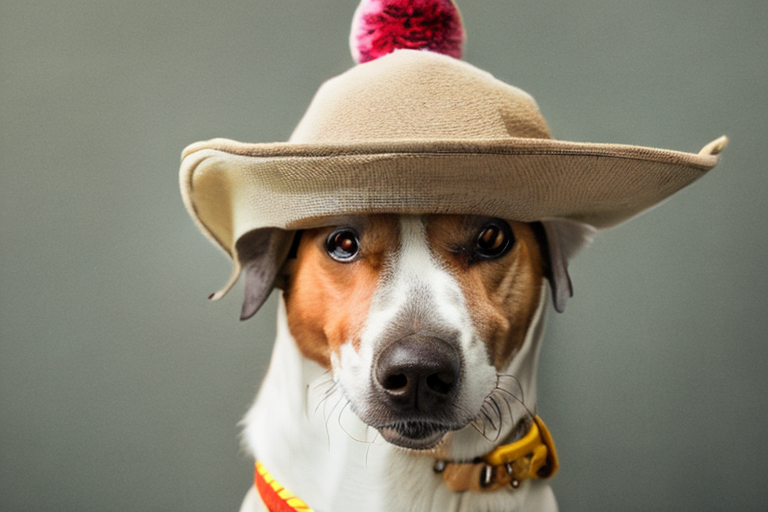

In [ ]:
image

## Pasos de iteración

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768, num_inference_steps= 10).images[0]


  0%|          | 0/10 [00:00<?, ?it/s]

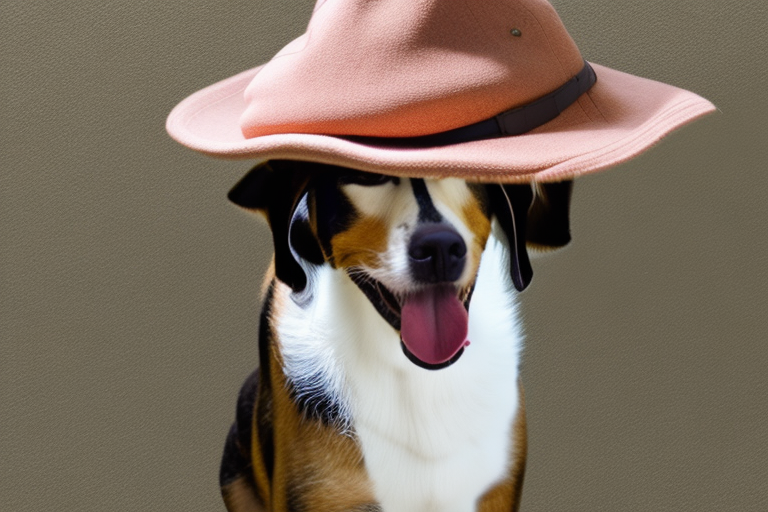

In [ ]:
image

## Guidance scale

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768, num_inference_steps= 30, guidance_scale=12).images[0]


  0%|          | 0/30 [00:00<?, ?it/s]

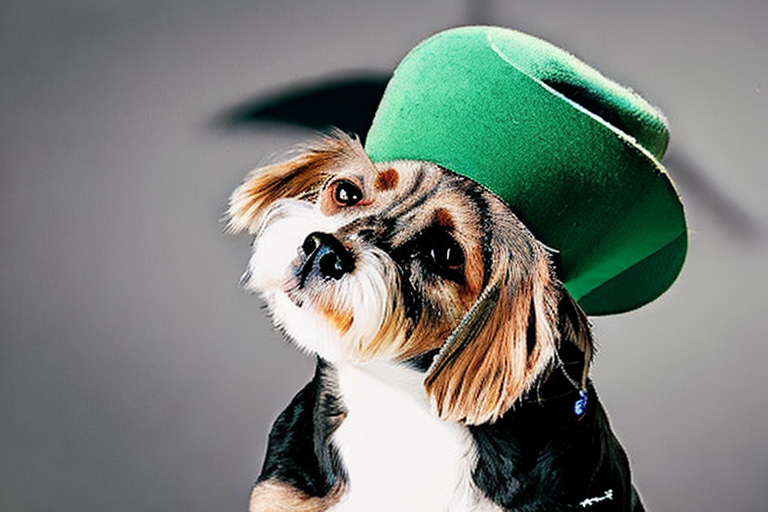

In [ ]:
image